Notes from Stat 849 at UW-Madison: http://www.stat.wisc.edu/courses/st849-bates/lectures/

I mostly copied from there, as doing this can help me understand/remember things better.

## Chapter 1: The Gaussian Linear Model
Reponses: Vector-valued random variable, $\mathcal{Y}$. Observed values of the responses, represented by the vector $y$.

Predictors: $X\beta$, where the $n \times p$ matrix $X$ is the *model matrix*, $n$ is the number of obsrvations, and $p$ is the dimension of the *coefficient vector*, $\beta$. The coefficients are *parameters* in the model. We form *estimates* $\hat{\beta}$ of these paramters from the observed data. We assume that $n \geq q$.

$$\mathcal{Y} \sim \text{Multivariate Gaussian}(X\beta_T, \sigma^2I_n)$$

where $\beta_T$ is the "true", but unknown, value of the coefficient vector. The probability density of $\mathcal{Y}$ (is also called a *spherical normal density*): $$f_{\mathcal{Y}}(\mathbf{y}) = \frac{1}{(2\pi\sigma^{2})^{n/2}} \exp\left(\frac{-\parallel\mathbf{y} - \mathbf{X}\beta_{T}\parallel^{2}}{2\sigma^2}\right)$$

The likelihhod: $$L(\beta,\sigma | \mathbf{y}) = \frac{1}{(2\pi\sigma^{2})^{n/2}} \exp\left(\frac{-\parallel\mathbf{y} - \mathbf{X}\beta\parallel^{2}}{2\sigma^2}\right)$$

The *maximum likelihood estimates (mles)* of the parameters are the values of the parameters ($\hat{\beta}, \hat{\sigma}$) that maximize the likelihood.

The log-likelihood: $$\ell(\beta,\sigma|\mathbf{y})=\log(L(\beta,\sigma|\mathbf{y}))=-\frac{n}{2}\log(2\pi\sigma^{2})-\frac{-\parallel\mathbf{y}-\mathbf{X}\beta\parallel^{2}}{2\sigma^{2}}$$

The *deviance*: $$d(\beta,\sigma|\mathbf{y}) = -2\ell(\beta,\sigma|\mathbf{y}) = n\log(2\pi\sigma^{2}) + \frac{-\parallel\mathbf{y}-\mathbf{X}\beta\parallel^{2}}{\sigma^{2}}$$ 

Because of the negative sign, the mle’s are the values that minimize the deviance. For any fixed value of $\sigma^2$, the deviance is minimized with respect to $\beta$ when the residual sum of squares, $$S(\beta | \mathbf{y}) = \parallel\mathbf{y} - \mathbf{X}\beta\parallel^{2},$$  
is minimized. Thus the mle of the coefficient vector, $\hat{\beta}$, in the Gaussian linear model is the *least squares estimate* $$\hat{\beta}=\arg\,\min_{\beta}\,\parallel\mathbf{y}-\mathbf{X}\beta\parallel^2.$$


### Linear algebra of least squares
An *orthogonal* $n \times n$ matrix, $Q$, has the property $Q'Q=QQ'=I_{n}$. An orthogonal matrix has a special property that it **preserves lengths**.
$$\parallel Qx\parallel^{2}=(Qx)'Qx=x'Q'Qx=x'x=\parallel x\parallel^{2}$$

#### The QR decomposition
**Any** $n\times p$ matrix $X$ has a QR decomposition consisting of
an orthogonal $n\times n$ matrix $Q$ and a $p\times p$ matrix $R$
that is zero below the main diagonal (in other words, it is *upper
triangular*). The QR decomposition of the model matrix $X$ is written
$$X=Q\begin{bmatrix}R\\
0
\end{bmatrix}=\begin{bmatrix}Q_{1} & Q_{2}\end{bmatrix}\begin{bmatrix}R\\
0
\end{bmatrix}=Q_{1}R$$

where $Q_{1}$ is the first $p$ columns of $Q$ and $Q_{2}$ is the last $n-p$ columns of $Q$.

If the diagonal elements of $R$ are all non-zero (in practice this means that none of them are very small in absolute value) then $X$ has *full column rank* and the columns of $Q_1$ form an orthonormal basis for the column space of $X$ [col($X$)]. If the rank of $X$ is $k < p$ (rank-deficient), using a $p \times p$ permutation matrix $P$, we can make the first $k$ columns of $Q$ form an othonormal basis for col($XP$).

$$\begin{array}{cl}
\hat{\beta} & = \arg\,\min_{\beta}\,\parallel\mathbf{y}-\mathbf{X}\beta\parallel^2\\
 & = \arg\,\min_{\beta}\,\parallel Q' (\mathbf{y}-\mathbf{X}\beta)\parallel^2\\
 & = \arg\,\min_{\beta}\,\parallel Q'\mathbf{y}-Q'\mathbf{X}\beta\parallel^2\\
 & = \arg\,\min_{\beta}\,\parallel Q'\mathbf{y}-Q'QR\beta\parallel^2\\
 & = \arg\,\min_{\beta}\,\parallel Q_1'\mathbf{y}-R\beta\parallel^2 + \parallel Q_2'\mathbf{y}\parallel
\end{array} $$

If rank($X$) = $p$ then rank($R$) = $p$ and $R^{-1}$ exists so we can write $\hat{\beta} = R^{-1}Q_1'\mathbf{y}$, though you do not acutually calculate $R^{-1}$ to solve for $\hat{\beta}$.

In a model fit by the `lm()` or `aov()` functions in `R` there is a component `$effects` which is $Q'\mathbf{y}$. The component `$qr` is a condensed form of the $QR$ decomposition of the model matrix $X$. The matrix $R$ is embedded in there but the matrix $Q$ is a virtual matrix represented as a product of Householder reflections and not usually evaluated/created explicitly.

In [2]:
data(Formaldehyde)
Formaldehyde

,carb,optden
1,0.1,0.086
2,0.3,0.269
3,0.5,0.446
4,0.6,0.538
5,0.7,0.626
6,0.9,0.782


In [3]:
(X <- model.matrix(lm1 <- lm(optden ~ 1 + carb, Formaldehyde)))
# model.matrix returns X

,(Intercept),carb
1,1.0,0.1
2,1.0,0.3
3,1.0,0.5
4,1.0,0.6
5,1.0,0.7
6,1.0,0.9


In [4]:
# model.frame generates X and y
(y = model.response(model.frame(lm1)))

1     2     3     4     5     6 
0.086 0.269 0.446 0.538 0.626 0.782

In [5]:
class(qrlm1 <- lm1$qr)

[1] "qr"

In [6]:
(R <- qr.R(qrlm1))

,(Intercept),carb
1,-2.44949,-1.26557
2,0.0000000,0.6390097


In [7]:
(Q1 <- qr.Q(qrlm1))

-0.4082483,-0.6520507
-0.4082483,-0.3390663
-0.40824829,-0.02608203
-0.4082483,0.1304101
-0.4082483,0.2869023
-0.4082483,0.5998866


In [8]:
(Q1R <- Q1 %*% R) 

(Intercept),carb
1.0,0.1
1.0,0.3
1.0,0.5
1.0,0.6
1.0,0.7
1.0,0.9


In [9]:
all.equal(X, Q1R, check.attributes = F) # should be able to reconstruct model matrix X

[1] TRUE

In [10]:
(Q <- qr.Q(qrlm1, complete=TRUE)) # produce the full n*n orthogonal matrix Q

-0.4082483,-0.6520507,-0.3737045,-0.3405290,-0.3073534,-0.2410023
-0.40824829,-0.33906635,0.05460995,0.22071963,0.38682932,0.71904869
-0.40824829,-0.02608203,0.86857638,-0.14397908,-0.15653455,-0.18164549
-0.4082483,0.1304101,-0.1535966,0.8125532,-0.2212971,-0.2889976
-0.4082483,0.2869023,-0.1757696,-0.2309146,0.7139404,-0.3963496
-0.4082483,0.5998866,-0.2201156,-0.3178501,-0.4155847,0.3889463


In [11]:
as.vector(lm1$effects)

[1] -1.121458054  0.559955028  0.005139411  0.009915668  0.010691926
[6] -0.007755559

In [12]:
as.vector(crossprod(Q, y)) # crossprod(A, B) creates A'B directly without creating A' from A
# crosspod(X) creates X'X; 
# tcrossprod(X) creates XX'.

[1] -1.121458054  0.559955028  0.005139411  0.009915668  0.010691926
[6] -0.007755559

In [13]:
as.vector(qr.qty(qrlm1, y)) # another way to produce Q'y

[1] -1.121458054  0.559955028  0.005139411  0.009915668  0.010691926
[6] -0.007755559

In [14]:
zapsmall(crossprod(Q1)) # Q1'Q1 = I

1,0
0,1


In [15]:
zapsmall(crossprod(Q)) # Q'Q = I

1,0,0,0,0,0
0,1,0,0,0,0
0,0,1,0,0,0
0,0,0,1,0,0
0,0,0,0,1,0
0,0,0,0,0,1


Because the diagonal elements of $R$ are all safely non-zero, we can sove the system $R\hat{\beta} = Q_1'\mathbf{y}$ for the coefficient estimates, $\hat{\beta}$, using `backsolve()` or `solve()` function.

In [16]:
backsolve(R, crossprod(Q1, y))

0.005085714
0.8762857


In [17]:
coef(lm1)

(Intercept)        carb 
0.005085714 0.876285714

The function `qr.coef()` combines the multiplication of $y$ by $Q_1'$ and the `backsolve` step.

In [18]:
qr.coef(qrlm1, y)

(Intercept)        carb 
0.005085714 0.876285714

#### The determinant of an orthogonal matrix
Determinant of the $k \times k$ square matrix $A$ is the **volumn** of the parallelepiped spanned by its columns (or rows). Because we can consider either the rows or the columns when evaluating the determinant, we must have
$$|A| = |A'|$$

Furthermore, the determinant of a diagonal matrix or a triangular matrix is simply the product of its diagonal elements. 

the determinant, $|A|$ is evaluated in practice is by forming the $QR$ decomposition of $A$, taking the product of the diagonal elements of $R$, and determining whether $|Q|$ has a plus or a minus sign.

In [19]:
det(crossprod(Q))

[1] 1

In [20]:
tcrossprod(Q1) %*% y

0.09271429
0.2679714
0.4432286
0.5308571
0.6184857
0.7937429


In [21]:
qr.fitted(qrlm1, y)

1          2          3          4          5          6 
0.09271429 0.26797143 0.44322857 0.53085714 0.61848571 0.79374286

In [22]:
qr.resid(qrlm1, y); resid(lm1)

1            2            3            4            5            6 
-0.006714286  0.001028571  0.002771429  0.007142857  0.007514286 -0.011742857

1            2            3            4            5            6 
-0.006714286  0.001028571  0.002771429  0.007142857  0.007514286 -0.011742857

#### Comparison to the usual text-book formulas

Most text books state that the least squares estimates are
$$\hat{\beta}=(X'X)^{-1}X'y$$
giving the impression that $\hat{\beta}$ is calculated this way.
It isn't.

If we substitute $X=Q_{1}R$ in the above equation, we get
$$(X'X)^{-1}X'y=(R'Q_{1}^{'}Q_{1}R)^{-1}R'Q_{1}^{'}y=(R'R)^{-1}R'Q_{1}^{'}y=R^{-1}(R')^{-1}R'Q_{1}^{'}y=R^{-1}Q_{1}^{'}y$$
our previous result.

**Whenever you see $X'X$ in a formula you should mentally replace it
by $R'R$ and similarly replace $(X'X)^{-1}$ by $R^{-1}(R')^{-1}$
then see if you can simplify the result.**

The R function `chol2inv()` calculates $(R'R)^{-1} = R^{-1}(R')^{-1}$ directly from
$R$ without evaluating $R^{-1}$ explicitly. In this way, it should
be faster and more accurate than evaluating $R^{-1}$ explicitly.

The determinant of $X'X$ is
$$|X'X|=|R'R|=|R|^{2}=\left(\prod_{i=1}^{p}r_{i,i}\right)^{2}$$


The fitted value $\hat{y}$ are $Q_{1}Q_{1}^{'}y$ and thus the *hat
matrix* (which puts a ``hat\textquotedblright{} on y by transforming
it to $\hat{y}$) is the $n\times n$ matrix $Q_{1}Q_{1}^{'}$. Often
we are interested in the diagonal elements of the hat matrix, which
are the sums of the squares of rows of $Q_{1}$. (In practice you
don\textquoteright t want to calculate the entire $n\times n$ hat
matrix just to get the diagonal elements when $n$ could be very large.)

The residuals, $\hat{e}=y-\hat{y}$, are calculated as $\hat{e}=Q_{2}Q_{2}^{'}y$.

The matrices $Q_{1}Q_{1}^{'}$ and $Q_{2}Q_{2}^{'}$ are *projection
matrices*, which means that they are symmetric and idempotent. ($A$
square matrix $A$ is idempotent if $AA=A$.) When $rank(X)=p$, the
hat matrix $Q_{1}Q_{1}^{'}$ projects any vector in $\mathbb{R}^{n}$
onto the column span of $X$. The other projection, $Q_{2}Q_{2}^{'}$,
is onto the subspace orthogonal to the column span of $X$.


#### The Cholesky decomposition
The Cholesky decomposition of a positive definite symmetric matrix,
which means a $p\times p$ symmetric matrix $A$ such that $x'Ax>0$
for all non-zero $x\in\mathbb{R}^{p}$ is of the form 

$$A=R'R=LL'$$

where $R$ is an upper triangular $p\times p$ matrix and $L=R'$
is lower triangular. The two forms are the same decomposition: it
is just a matter of whether you want $R$, the factor on the right,
or $L$, the factor on the left. Generally statisticians write the
decomposition as $R'R$. 

The decomposition is only determined up to changes in sign of the
rows of $R$ (or, equivalently, the columns of $L$). For definiteness
we require positive diagonal elements in $R$. When $\text{rank}(X)=p$
the Cholesky decomposition $R$ of $X'X$ is the equal to the matrix
$R$ from the $QR$ decomposition up to changes in sign of rows. The
matrix $X'X$ matrix is obviously symmetric and it is positive definite
because $x'(X'X)x=x'(R'R)x=||Rx||^{2}\geq0$ with equality only when
$Rx=0$, which, when $\text{rank}(X)=p$, implies that $x=0$.

The R function `chol()` evaluate the Cholesky decomposition; `chol2inv()` creates $(X'X)^{-1}$ directly from the Cholesky decomposition
of $X'X$. **Generally the QR decomposition is preferred to the Cholesky
decomposition for least squares problems** because there is a certain
loss of precision when forming $X'X$. However, when $n$ is very
large you may want to build up $X'X$ using blocks of rows. Also,
if $X$ is sparse it is an advantage to use sparse matrix techniques
to evaluate and store the Cholesky decomposition.



In [23]:
chol(crossprod(X))

,(Intercept),carb
(Intercept),2.44949,1.26557
carb,0.0000000,0.6390097


#### The singular value decomposition
Another decomposition related to orthogonal matrices is the singular value decomposition (or SVD) in which the matrix $X$ is reduced to a diagonal form 
$$X=U_{1}DV'=U\begin{bmatrix}D\\
0
\end{bmatrix}V'$$

where $U$ is an $n\times n$ orthogonal matrix, $D$ is a $p\times p$
diagonal matrix with non-negative diagonal elements (which are called
the **singular values** of $X$) and $V$ is a $p\times p$ orthogonal
matrix. As for $Q$ and $Q_{1}$, $U_{1}$ consists of the first $p$
columns of $U$. For definiteness we order the diagonal elements of
$D$, which must be non-negative, in decreasing order.

One way to **visualize the singular value decomposition** of $X$ is to
remember that a $p$-sphere in $\mathbb{R}^{p}$ will get mapped to
an ellipsoid in col($X$) by $X$. The singular values are the lengths
of the principal axes of this ellipsoid. The right singular vectors
(columns of $V$) are the directions in the parameter space that map
onto the principal axes of the ellipsoid. The first rank($X$) left
singular vectors (columns of $U$) are the principal axes of the ellipsoid.

The singular value decomposition of $X$ is related to the eigendecomposition
or spectral decomposition of $X'X$ because 
$$X'X=VDU_{1}^{'}U_{1}DV'=VD^{2}V'$$

implying that the eigenvalues of $X'X$ are the squares of the singular
values of $X$ and the right singular vectors, which are the columns
of $V$, are also the eigenvectors of $X'X$.

Calculation of the SVD is an *iterative* (as opposed to a direct) computation
and potentially more computing intensive than the QR decomposition,
although modern methods for evaluating the SVD are very good indeed.

Symbolically we can write the least squares solution in the full-rank
case as $\hat{\beta}=VD^{-1}U_{1}^{'}y$.


In [25]:
str(Xsv <- svd(X))

List of 3
 $ d: num [1:2] 2.773 0.564
 $ u: num [1:6, 1:2] -0.334 -0.368 -0.403 -0.42 -0.437 ...
 $ v: num [1:2, 1:2] -0.878 -0.479 -0.479 0.878


In [26]:
Xsv$u %*% (Xsv$d * Xsv$v) # X = UDV
# multiplication of a matrix on the left by a diagonal matrix corresponds to scaling its rows, 

1.0,0.1
1.0,0.3
1.0,0.5
1.0,0.6
1.0,0.7
1.0,0.9


The squares of the singular values should be the eigenvalues of $X'X$ and the eigenvectors of $X'X$ should be the columns of $V$, up to changes in sign along columns. (The eigenvectors, which are really just directions, are only determined up to changes in sign, and in the case of repeated eigenvalues, only up to orthogonal transformation within the repeated eigenvalue’s eigenspace.)

In [28]:
eigen(crossprod(X))
Xsv$d^2
Xsv$v

-0.8778294,0.4789735
-0.4789735,-0.8778294


[1] 7.6914651 0.3185349

-0.8778294,-0.4789735
-0.4789735,0.8778294


In practice, you **never need to calculate the eigenvalues and eigenvectors
of $X'X$**. It is more effective and more stable to calculate the singular
value decomposition of $X$ and use the squares of the singular values
and the `$v` component (assuming that you really do need the eigenvalues
and eigenvectors which, most of the time, you don't). 

The reason that it is **preferable to work with decompositions of $X$
rather than forming $X'X$** is related to the *condition number* of these
matrices. As described on the Wikipedia page, the condition number
of a matrix, written $\kappa(X)$, is the ratio of its largest and smallest
singular values. Obviously we must have $\kappa(X)\geq1$. A matrix with
$\kappa$ close to 1 is well-conditioned. A matrix with a very large condition
number is close to being singular, in that spheres are mapped to highly
elongated ellipsoids. 

An orthogonal matrix or a rectangular matrix with orthonormal columns
must have a condition number of 1 because it maps a sphere to a sphere.
(Recall that, for us, rectangular matrices like $X$ have more rows
than columns. In the opposite case, more columns than rows, it would
be the rows that are orthonormal.) In fact, all the singular values
of an orthogonal matrix must be unity because it preserves lengths
so the unit sphere gets mapped to the unit sphere.


In [29]:
svd(Q, nu=0, nv=0)$d

[1] 1 1 1 1 1 1

In [30]:
#kappa of X
Xsv$d[1]/Xsv$d[length(Xsv$d)]

[1] 4.913897

In [31]:
kappa(X, exact = TRUE)

[1] 4.913897

In practice we usually calculate the reciprocal of the condition number because its value is in [0, 1] and it is easier to decide when it is close to zero instead of trying to decide when $\kappa(X)$ is “close to” $\infty$. A matrix is considered computationally singular when its reciprocal condition number is within some multiple, typical values are 10 or 100, of `.Machine$double.eps`.

Getting back to the question of why we prefer to **work with $X$ directly,
instead of forming $X'X$**, it is because $\kappa(X'X)=\kappa(X)^{2}$.
If $\kappa(X)^{2}=10^{6}$, which is large but not catastrophically
so, then $\kappa(X'X)=10^{12}$, which means it is very close to being
singular.

In [32]:
.Machine$double.eps

[1] 2.220446e-16

Finally, let\textquoteright s revisit the idea of the singular values
being the lengths of the principal axes of the image of the unit sphere
in the map $\beta\rightarrow X\beta$. When $p=2$ the unit sphere
is the circle of radius 1 centered at the origin and the ellipsoid
mentioned above will be an ellipse.

To plot the this image in two dimensions we need to represent these
points with respect to an orthogonal basis for col($X$). Fortunately
we have two such bases: the columns of $Q_{1}$ and of $U_{1}$. In
the $U_{1}$ basis the principal axes of the ellipse correspond to
the coordinate axes. In the $Q_{1}$ basis the principal axes are
skewed.

In [34]:
# a unit circle
rad <- seq(0, 2*pi, len=201)
(circ <- rbind(cos(rad), sin(rad)))

1.000000e+00,9.995066e-01,9.980267e-01,9.955620e-01,9.921147e-01,9.876883e-01,9.822873e-01,9.759168e-01,9.685832e-01,9.602937e-01,9.510565e-01,9.408808e-01,9.297765e-01,9.177546e-01,9.048271e-01,8.910065e-01,8.763067e-01,8.607420e-01,8.443279e-01,8.270806e-01,8.090170e-01,7.901550e-01,7.705132e-01,7.501111e-01,7.289686e-01,7.071068e-01,6.845471e-01,6.613119e-01,6.374240e-01,6.129071e-01,5.877853e-01,5.620834e-01,5.358268e-01,5.090414e-01,4.817537e-01,4.539905e-01,4.257793e-01,3.971479e-01,3.681246e-01,3.387379e-01,3.090170e-01,2.789911e-01,2.486899e-01,2.181432e-01,1.873813e-01,1.564345e-01,1.253332e-01,9.410831e-02,6.279052e-02,3.141076e-02,-1.608123e-16,-3.141076e-02,-6.279052e-02,-9.410831e-02,-1.253332e-01,-1.564345e-01,-1.873813e-01,-2.181432e-01,-2.486899e-01,-2.789911e-01,-3.090170e-01,-3.387379e-01,-3.681246e-01,-3.971479e-01,-4.257793e-01,-4.539905e-01,-4.817537e-01,-5.090414e-01,-5.358268e-01,-5.620834e-01,-5.877853e-01,-6.129071e-01,-6.374240e-01,-6.613119e-01,-6.845471e-01,-7.071068e-01,-7.289686e-01,-7.501111e-01,-7.705132e-01,-7.901550e-01,-8.090170e-01,-8.270806e-01,-8.443279e-01,-8.607420e-01,-8.763067e-01,-8.910065e-01,-9.048271e-01,-9.177546e-01,-9.297765e-01,-9.408808e-01,-9.510565e-01,-9.602937e-01,-9.685832e-01,-9.759168e-01,-9.822873e-01,-9.876883e-01,-9.921147e-01,-9.955620e-01,-9.980267e-01,-9.995066e-01,-1.000000e+00,-9.995066e-01,-9.980267e-01,-9.955620e-01,-9.921147e-01,-9.876883e-01,-9.822873e-01,-9.759168e-01,-9.685832e-01,-9.602937e-01,-9.510565e-01,-9.408808e-01,-9.297765e-01,-9.177546e-01,-9.048271e-01,-8.910065e-01,-8.763067e-01,-8.607420e-01,-8.443279e-01,-8.270806e-01,-8.090170e-01,-7.901550e-01,-7.705132e-01,-7.501111e-01,-7.289686e-01,-7.071068e-01,-6.845471e-01,-6.613119e-01,-6.374240e-01,-6.129071e-01,-5.877853e-01,-5.620834e-01,-5.358268e-01,-5.090414e-01,-4.817537e-01,-4.539905e-01,-4.257793e-01,-3.971479e-01,-3.681246e-01,-3.387379e-01,-3.090170e-01,-2.789911e-01,-2.486899e-01,-2.181432e-01,-1.873813e-01,-1.564345e-01,-1.253332e-01,-9.410831e-02,-6.279052e-02,-3.141076e-02,-1.836970e-16,3.141076e-02,6.279052e-02,9.410831e-02,1.253332e-01,1.564345e-01,1.873813e-01,2.181432e-01,2.486899e-01,2.789911e-01,3.090170e-01,3.387379e-01,3.681246e-01,3.971479e-01,4.257793e-01,4.539905e-01,4.817537e-01,5.090414e-01,5.358268e-01,5.620834e-01,5.877853e-01,6.129071e-01,6.374240e-01,6.613119e-01,6.845471e-01,7.071068e-01,7.289686e-01,7.501111e-01,7.705132e-01,7.901550e-01,8.090170e-01,8.270806e-01,8.443279e-01,8.607420e-01,8.763067e-01,8.910065e-01,9.048271e-01,9.177546e-01,9.297765e-01,9.408808e-01,9.510565e-01,9.602937e-01,9.685832e-01,9.759168e-01,9.822873e-01,9.876883e-01,9.921147e-01,9.955620e-01,9.980267e-01,9.995066e-01,1.000000e+00
0.000000e+00,3.141076e-02,6.279052e-02,9.410831e-02,1.253332e-01,1.564345e-01,1.873813e-01,2.181432e-01,2.486899e-01,2.789911e-01,3.090170e-01,3.387379e-01,3.681246e-01,3.971479e-01,4.257793e-01,4.539905e-01,4.817537e-01,5.090414e-01,5.358268e-01,5.620834e-01,5.877853e-01,6.129071e-01,6.374240e-01,6.613119e-01,6.845471e-01,7.071068e-01,7.289686e-01,7.501111e-01,7.705132e-01,7.901550e-01,8.090170e-01,8.270806e-01,8.443279e-01,8.607420e-01,8.763067e-01,8.910065e-01,9.048271e-01,9.177546e-01,9.297765e-01,9.408808e-01,9.510565e-01,9.602937e-01,9.685832e-01,9.759168e-01,9.822873e-01,9.876883e-01,9.921147e-01,9.955620e-01,9.980267e-01,9.995066e-01,1.000000e+00,9.995066e-01,9.980267e-01,9.955620e-01,9.921147e-01,9.876883e-01,9.822873e-01,9.759168e-01,9.685832e-01,9.602937e-01,9.510565e-01,9.408808e-01,9.297765e-01,9.177546e-01,9.048271e-01,8.910065e-01,8.763067e-01,8.607420e-01,8.443279e-01,8.270806e-01,8.090170e-01,7.901550e-01,7.705132e-01,7.501111e-01,7.289686e-01,7.071068e-01,6.845471e-01,6.613119e-01,6.374240e-01,6.129071e-01,5.877853e-01,5.620834e-01,5.358268e-01,5.090414e-01,4.817537e-01,4.539905e-01,4.257793e-01,3.971479e-01,3.681246e-01,3.387379e-01,3.090170e-01,2.789911e-01,2.486899e-01,2.181432e-01,1.873813e-01,1.564345e-01,1.253332e-01,9.410831e-02,6.279052e-02

In [35]:
# The n-dimensional response vectors corresponding to these points on the circle
(fits <- X %*% circ) # 6 by 201

1,1.000000000,1.002647636,1.004305780,1.004972796,1.004648025,1.003331787,1.001025382,0.997731086,0.993452150,0.988192796,0.981958216,0.974754561,0.966588941,0.957469415,0.947404982,0.936405574,0.924482047,0.911646169,0.897910605,0.883288912,0.867795520,0.851445718,0.834255642,0.816242256,0.797423338,0.777817459,0.757443969,0.736322972,0.714475314,0.691922555,0.668686952,0.644791435,0.620259588,0.595115618,0.569384342,0.543091152,0.516261997,0.488923353,0.461102201,0.432825997,0.404122646,0.375020475,0.345548203,0.315734918,0.285610040,0.255203299,0.224544704,0.193664510,0.162593192,0.131361415,0.100000000,0.068539897,0.037012153,0.005447883,-0.026121763,-0.057665631,-0.089152590,-0.120551565,-0.151831571,-0.182961737,-0.213911343,-0.244649843,-0.275146904,-0.305372428,-0.335296586,-0.364889847,-0.394123006,-0.422967213,-0.451394002,-0.479375320,-0.506883553,-0.533891552,-0.560372665,-0.586300758,-0.611650243,-0.636396103,-0.660513917,-0.683979883,-0.706770844,-0.728864307,-0.750238469,-0.770872236,-0.790745246,-0.809837885,-0.828131313,-0.845607474,-0.862249123,-0.878039837,-0.892964031,-0.907006977,-0.920154817,-0.932394575,-0.943714172,-0.954102438,-0.963549119,-0.972044894,-0.979581378,-0.986151133,-0.991747676,-0.996365484,-1.000000000,-1.002647636,-1.004305780,-1.004972796,-1.004648025,-1.003331787,-1.001025382,-0.997731086,-0.993452150,-0.988192796,-0.981958216,-0.974754561,-0.966588941,-0.957469415,-0.947404982,-0.936405574,-0.924482047,-0.911646169,-0.897910605,-0.883288912,-0.867795520,-0.851445718,-0.834255642,-0.816242256,-0.797423338,-0.777817459,-0.757443969,-0.736322972,-0.714475314,-0.691922555,-0.668686952,-0.644791435,-0.620259588,-0.595115618,-0.569384342,-0.543091152,-0.516261997,-0.488923353,-0.461102201,-0.432825997,-0.404122646,-0.375020475,-0.345548203,-0.315734918,-0.285610040,-0.255203299,-0.224544704,-0.193664510,-0.162593192,-0.131361415,-0.100000000,-0.068539897,-0.037012153,-0.005447883,0.026121763,0.057665631,0.089152590,0.120551565,0.151831571,0.182961737,0.213911343,0.244649843,0.275146904,0.305372428,0.335296586,0.364889847,0.394123006,0.422967213,0.451394002,0.479375320,0.506883553,0.533891552,0.560372665,0.586300758,0.611650243,0.636396103,0.660513917,0.683979883,0.706770844,0.728864307,0.750238469,0.770872236,0.790745246,0.809837885,0.828131313,0.845607474,0.862249123,0.878039837,0.892964031,0.907006977,0.920154817,0.932394575,0.943714172,0.954102438,0.963549119,0.972044894,0.979581378,0.986151133,0.991747676,0.996365484,1.000000000
2,1.00000000,1.00892979,1.01686388,1.02379446,1.02971467,1.03461868,1.03850165,1.04135973,1.04319013,1.04399102,1.04376161,1.04250215,1.04021385,1.03689899,1.03256084,1.02720367,1.02083278,1.01345445,1.00507596,0.99570559,0.98535257,0.97402713,0.96174044,0.94850463,0.93433276,0.91923882,0.90323769,0.88634519,0.86857796,0.84995356,0.83049035,0.81020755,0.78912517,0.76726402,0.74464568,0.72129246,0.69722741,0.67247428,0.64705750,0.62100215,0.59433395,0.56707921,0.53926484,0.51091827,0.48206749,0.45274097,0.42296764,0.39277690,0.36219854,0.33126273,0.30000000,0.26844121,0.23661750,0.20456028,0.17230118,0.13987204,0.10730486,0.07463179,0.04188506,0.00909700,-0.02370004,-0.05647369,-0.08919161,-0.12182150,-0.15433118,-0.18668854,-0.21886167,-0.25081881,-0.28252842,-0.31395921,-0.34508015,-0.37586055,-0.40627002,-0.43627854,-0.46585652,-0.49497475,-0.52360450,-0.55171751,-0.57928605,-0.60628290,-0.63268142,-0.65845556,-0.68357989,-0.70802960,-0.73178058,-0.75480937,-0.77709326,-0.79861026,-0.81933912,-0.83925939,-0.85835142,-0.87659635,-0.89397619,-0.91047379,-0.92607286,-0.94075800,-0.95451473,-0.96732947,-0.97918957,-0.99008333,-1.00000000,-1.00892979,-1.01686388,-1.02379446,-1.02971467,-1.03461868,-1.03850165,-1.04135973,-1.04319013,-1.04399102,-1.04376161,-1.04250215,-1.04021385,-1.03689899,-1.03256084,-1.02720367,-1.02083278,-1.01345445,-1.00507596,-0.99570559,-0.98535257,-0.97402713,-0.96174044,-0.94850463,-0.93433276,-0.91923882,-0.90323769,-0.88634519,-0.86857

In [45]:
twoD <- rbind(data.frame(t(crossprod(Xsv$u, fits))),
              data.frame(t(crossprod(Q1, fits))))
twoD$mat <- factor(rep(c("U","Q"), each = ncol(fits)), levels=c("U","Q"))
head(twoD)

,X1,X2,mat
1,-2.434527,-0.2703273,U
2,-2.475051,-0.2546319,U
3,-2.513132,-0.2386851,U
4,-2.548733,-0.2225029,U
5,-2.581818,-0.206101,U
6,-2.612356,-0.1894957,U


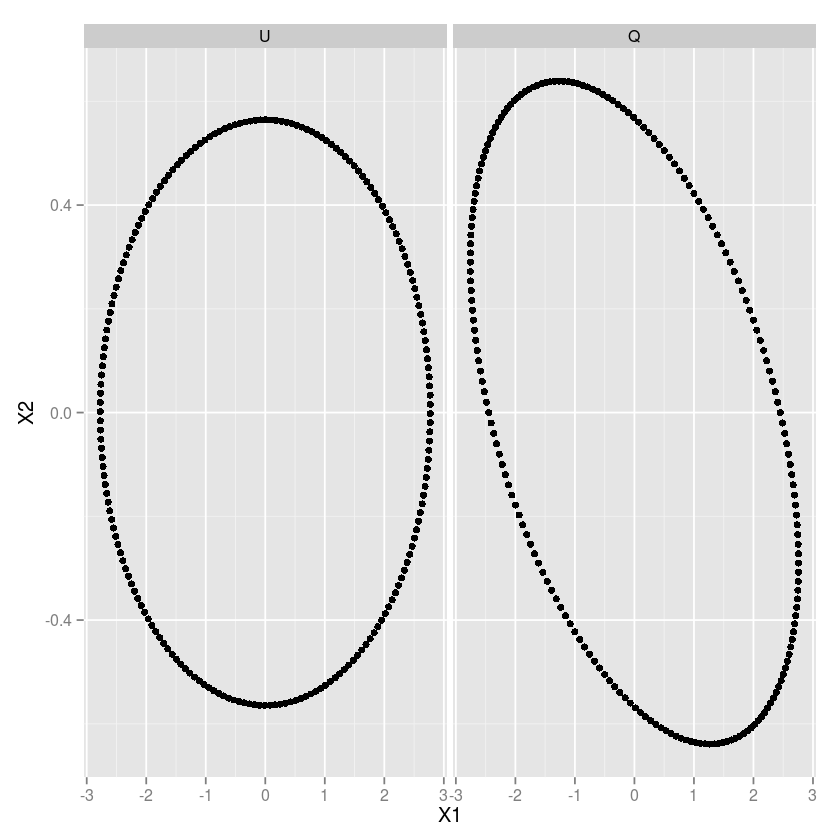

In [48]:
#%%R -w 480 -h 240 -u px
library(ggplot2)
ggplot(data = twoD, aes(x = X1, y = X2)) +
geom_point() + facet_wrap(~mat, ncol = 2)

#### Eigenvalues and Eigenvectors
For any $k\times k$ matrix $A$, the roots of the kth degree polynomial
equation in $\lambda$, $|\lambda I_{k}-A|=0$, which we will write
as $\lambda_{1},\ldots,\lambda_{k}$ are called the *eigenvalues* of
$A$. The polynomial is called the *characteristic polynomial* of $A$.
Any nonzero $n\times1$ vector $v_{i}\neq0$ such that $Av_{i}=\lambda_{i}v_{i}$
is an *eigenvector* of $A$ corresponding to the eigenvalue $\lambda_{i}$.
For any diagonal matrix $D=\text{diag}(d_{1},\ldots,d_{k})$, $|\lambda I_{k}-D|=\prod_{i=1}^{k}(\lambda-d_{i})=0$
has roots $d_{i}$, therefore the diagonal elements $d_{i}$, $i=1,\ldots,n$
are the eigenvalues of $D$.

If $Q$ is an orthogonal matrix, then $QAQ'$ and $A$ have the **same eigenvalues**.

#### Diagonalization of a Symmetric Matrix
For any $k\times k$ symmetric matrix $A$ (i.e. $A'=A$), there exists
an orthogonal matrix $Q$ such that $QAQ'$ is a diagonal matrix $\varLambda=\text{diag}(\lambda_{1},\ldots,\lambda_{k})$
where $\lambda_{i}$ are the eigenvalues of $A$. The corresponding
eigenvectors of $A$ are the column vectors of $Q$.

#### Spectral Decomposition
From the relationship $QAQ'=\varLambda$ just established for a $k\times k$
symmetric matrix $A$ we can compute its spectral decomposition, 
$$A=Q\varLambda Q'=\sum_{i=1}^{k}\lambda_{i}q_{i}q_{i}^{'}$$

where $q_{i}$ is the *i*th column of $Q$. $QQ'=\sum_{i=1}^{k}q_{i}q_{i}^{'}=I$.

#### Trace and Determinant of A
The relationship $QAQ'=\varLambda$ for symmetric $A$ implies that
the trace, tr($A$), and the determinant, $|A|$, are the same as
those of $\varLambda$.
$$\text{tr}(A)=\text{tr}(Q\varLambda Q')=\text{tr}(\varLambda QQ')=\text{tr}(\varLambda)=\sum_{i=1}^{k}\lambda_{i}$$
$$|A|=|Q\varLambda Q'|=|Q||\varLambda||Q'|=|Q|^{2}|\varLambda|=\prod_{i=1}^{k}\lambda_{i}$$


